In [4]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np

In [3]:
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip


In [5]:
!wget https://www.bindingdb.org/rwd/bind/downloads/BindingDB_All_202503_tsv.zip

--2025-03-09 08:13:43--  https://www.bindingdb.org/rwd/bind/downloads/BindingDB_All_202503_tsv.zip
Resolving www.bindingdb.org (www.bindingdb.org)... 132.239.186.19
Connecting to www.bindingdb.org (www.bindingdb.org)|132.239.186.19|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 506555284 (483M) [application/zip]
Saving to: ‘BindingDB_All_202503_tsv.zip’

BindingDB_All_20250 100%[===================>] 483.09M  24.5MB/s    in 25s     

2025-03-09 08:14:08 (19.2 MB/s) - ‘BindingDB_All_202503_tsv.zip’ saved [506555284/506555284]



In [2]:
with open('BindingDB_All.tsv', 'r') as file:
    for i, line in enumerate(file):
        if i == 0:  # Check problematic lines
            line = line.split('\t')
            curr_line = line
            #for l in line: 
                #print(l)

In [3]:
curr_line = curr_line[:50]

In [4]:
curr_line

['BindingDB Reactant_set_id',
 'Ligand SMILES',
 'Ligand InChI',
 'Ligand InChI Key',
 'BindingDB MonomerID',
 'BindingDB Ligand Name',
 'Target Name',
 'Target Source Organism According to Curator or DataSource',
 'Ki (nM)',
 'IC50 (nM)',
 'Kd (nM)',
 'EC50 (nM)',
 'kon (M-1-s-1)',
 'koff (s-1)',
 'pH',
 'Temp (C)',
 'Curation/DataSource',
 'Article DOI',
 'BindingDB Entry DOI',
 'PMID',
 'PubChem AID',
 'Patent Number',
 'Authors',
 'Institution',
 'Link to Ligand in BindingDB',
 'Link to Target in BindingDB',
 'Link to Ligand-Target Pair in BindingDB',
 'Ligand HET ID in PDB',
 'PDB ID(s) for Ligand-Target Complex',
 'PubChem CID',
 'PubChem SID',
 'ChEBI ID of Ligand',
 'ChEMBL ID of Ligand',
 'DrugBank ID of Ligand',
 'IUPHAR_GRAC ID of Ligand',
 'KEGG ID of Ligand',
 'ZINC ID of Ligand',
 'Number of Protein Chains in Target (>1 implies a multichain complex)',
 'BindingDB Target Chain Sequence',
 'PDB ID(s) of Target Chain',
 'UniProt (SwissProt) Recommended Name of Target Chain',

In [5]:
ptsv = pd.DataFrame(columns=curr_line)

In [8]:
with open('BindingDB_All.tsv', 'r') as file:
    for i, line in tqdm(enumerate(file)):
        if 190000 > i > 180000:  # Check problematic lines
            line = line.split('\t')
            #print(len(line))
            try: 
                ptsv.loc[len(ptsv)] = line
            except: 
                continue

2991389it [01:21, 36561.08it/s] 


In [9]:
ptsv.to_csv('BDB18.csv')

In [75]:
bdb1 = pd.read_csv('BDB1.csv')
bdb2 = pd.read_csv('BDB2.csv')

In [10]:
bdb_full = pd.DataFrame(columns=curr_line)

In [11]:
for i in range(2, 19): 
    bdbi = pd.read_csv(f'BDB{i}.csv')
    bdb_full = pd.concat([bdb_full, bdbi], ignore_index=True)

/tmp/ipykernel_692/1058994351.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  bdb_full = pd.concat([bdb_full, bdbi], ignore_index=True)
/tmp/ipykernel_692/1058994351.py:2: DtypeWarning: Columns (11,16,18,22,46,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  bdbi = pd.read_csv(f'BDB{i}.csv')
/tmp/ipykernel_692/1058994351.py:2: DtypeWarning: Columns (9,10,12,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  bdbi = pd.read_csv(f'BDB{i}.csv')
/tmp/ipykernel_692/1058994351.py:2: DtypeWarning: Columns (16,22,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  bdbi = pd.read_csv(f'BDB{i}.csv')
/tmp/ipykernel_692/1058994351.py:2: DtypeWarnin

In [12]:
ic50 = bdb_full['IC50 (nM)']
ic50 = ic50.dropna()

In [13]:
ic50_values = []
for index, value in ic50.items(): 
    try: 
        value = float(value)
        ic50_values.append(value)
    except: 
        continue

In [16]:
ic_sample = random.sample(ic50_values, 1000)

(0.0, 1000000.0)

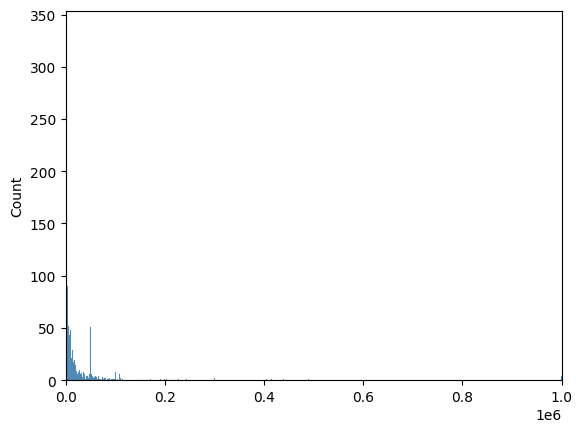

In [26]:
sns.histplot(ic_sample, bins=1000)
plt.xlim(0, 1000000)

In [27]:
ki = bdb_full['Ki (nM)']
ki = ki.dropna()

In [28]:
ki_values = []
for index, value in ki.items(): 
    try: 
        value = float(value)
        ki_values.append(value)
    except: 
        continue

In [29]:
ki_sample = random.sample(ki_values, 1000)

<Axes: ylabel='Count'>

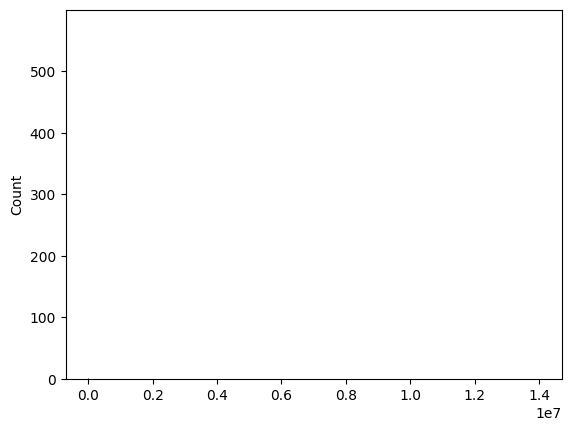

In [30]:
sns.histplot(ki_sample)

In [31]:
###Choosing to use IC50 because its distribution is less spread out

In [32]:
bdb_full.to_csv('bdb_full_unfiltered.csv')

In [77]:
bdb_full = pd.read_csv('bdb_full_unfiltered.csv')

/tmp/ipykernel_692/4275500283.py:1: DtypeWarning: Columns (9,11,12,14,16,18,22,46,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  bdb_full = pd.read_csv('bdb_full_unfiltered.csv')


In [78]:
#Dropping all nan IC50 values
bdb_full = bdb_full.dropna(subset=['IC50 (nM)']).reset_index()

In [79]:
bdb_full['IC50 (nM)'] = pd.to_numeric(bdb_full['IC50 (nM)'], errors='coerce')

In [80]:
bdb_full = bdb_full.dropna(subset=['IC50 (nM)']).reset_index()

In [88]:
np.percentile(bdb_full['IC50 (nM)'].values, 99)

267265.25599998067

In [93]:
bdb_full = bdb_full[bdb_full['IC50 (nM)'] < 100000]

In [95]:
bdb_full.to_csv('bdb_full_filtered.csv')

In [100]:
bdb_full[['Ligand SMILES', 'BindingDB Target Chain Sequence', 'IC50 (nM)']].to_csv('BDB_abbreviated.csv')

In [102]:
# Specify the file path
file_path = 'smile_values.txt'

# Open the file in write mode
with open(file_path, 'w') as file:
    # Iterate over the Series values and write each to a new line
    for value in bdb_full['Ligand SMILES'].values:
        file.write(str(value) + '\n')

,level_0,index,Unnamed: 0.1,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name,...,UniProt (SwissProt) Entry Name of Target Chain,UniProt (SwissProt) Primary ID of Target Chain,UniProt (SwissProt) Secondary ID(s) of Target Chain,UniProt (SwissProt) Alternative ID(s) of Target Chain,UniProt (TrEMBL) Submitted Name of Target Chain,UniProt (TrEMBL) Entry Name of Target Chain,UniProt (TrEMBL) Primary ID of Target Chain,UniProt (TrEMBL) Secondary ID(s) of Target Chain,UniProt (TrEMBL) Alternative ID(s) of Target Chain,Unnamed: 0
0,1,144,144,145,O=C1CCCC2=C1C1(CCS(=O)(=O)C1)N=C(Nc1nc3ccccc3o...,InChI=1S/C25H28Cl2O6/c1-6-7-8-9-10-17(15-11-18...,BLBHGUJDTWXHFE-UHFFFAOYSA-N,2764,"2-(benzo[d]oxazol-2-ylamino)-4',5',7,8-tetrahy...",Galactokinase,...,GALK1_HUMAN,P51570,B2RC07 B4E1G6,NaN,NaN,NaN,NaN,NaN,\n,144.0
1,2,180,180,181,CC(C)[C@H](NC(C)=O)C(=O)N[C@@H](Cc1ccccc1)[C@@...,InChI=1S/C31H51N5O5/c1-20(2)28(32-22(5)37)30(4...,JNBVLGDICHLLTN-DZUOILHNSA-N,201,"(2S)-N-[(2S,3S)-4-[(2S)-N'-(cyclohexylmethyl)-...",Dimer of Gag-Pol polyprotein [489-587],...,POL_HV1N5,P12497,NaN,NaN,NaN,NaN,NaN,NaN,\n,180.0
2,3,181,181,182,CCOC(=O)N[C@@H](C(C)C)C(=O)N[C@@H](Cc1ccccc1)[...,InChI=1S/C33H55N5O7/c1-7-44-32(42)35-28(22(3)4...,WEFMCBSODKDJFB-DZUOILHNSA-N,202,CGP 53820 analog::CHEMBL324572::ethyl N-[(1S)-...,Dimer of Gag-Pol polyprotein [489-587],...,POL_HV1N5,P12497,NaN,NaN,NaN,NaN,NaN,NaN,\n,181.0
3,4,183,183,184,COCCOC(=O)N[C@@H](C(C)C)C(=O)N[C@@H](Cc1ccccc1...,InChI=1S/C35H59N5O9/c1-24(2)30(37-34(44)48-19-...,XEBVQLCYEMXQLM-ORYMTKCHSA-N,204,"2-methoxyethyl N-[(1S)-1-{[(2S,3S)-4-[(2S)-N'-...",Dimer of Gag-Pol polyprotein [489-587],...,POL_HV1N5,P12497,NaN,NaN,NaN,NaN,NaN,NaN,\n,183.0
4,5,184,184,185,COCCOCCOC(=O)N[C@@H](C(C)C)C(=O)N[C@@H](Cc1ccc...,InChI=1S/C39H67N5O11/c1-28(2)34(41-38(48)54-23...,OLBLSEVYAPOMFN-BBACVFHCSA-N,205,"2-(2-methoxyethoxy)ethyl N-[(1S)-1-{[(2S,3S)-4...",Dimer of Gag-Pol polyprotein [489-587],...,POL_HV1N5,P12497,NaN,NaN,NaN,NaN,NaN,NaN,\n,184.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75165,100640,211777,211777,189712,C(Oc1ccccc1)\C=C\c1ccccc1,InChI=1S/C15H14O/c1-3-8-14(9-4-1)10-7-13-16-15...,LLOUPYJHSJUFQI-JXMROGBWSA-N,86790,"Benzyl phenyl ether analogue, 6b",Amine oxidase [flavin-containing] B,...,AOFB_HUMAN,P27338,B2R6R3 B7Z5H3 D3DWC3 Q7Z6S2,NaN,NaN,NaN,NaN,NaN,\n,19703.0
75166,100641,211778,211778,189713,Brc1ccc(COc2ccccc2)cc1,InChI=1S/C13H11BrO/c14-12-8-6-11(7-9-12)10-15-...,KZVLWVAXLYUCLW-UHFFFAOYSA-N,86791,"Benzyl phenyl ether analogue, 6c",Amine oxidase [flavin-containing] B,...,AOFB_HUMAN,P27338,B2R6R3 B7Z5H3 D3DWC3 Q7Z6S2,NaN,NaN,NaN,NaN,NaN,\n,19704.0
75167,100642,211779,211779,189714,Brc1ccc(CCOc2ccccc2)cc1,InChI=1S/C14H13BrO/c15-13-8-6-12(7-9-13)10-11-...,NTFRJPBLOCKZDQ-UHFFFAOYSA-N,86792,"Benzyl phenyl ether analogue, 6d",Amine oxidase [flavin-containing] B,...,AOFB_HUMAN,P27338,B2R6R3 B7Z5H3 D3DWC3 Q7Z6S2,NaN,NaN,NaN,NaN,NaN,\n,19705.0
75172,100647,211784,211784,189719,CCOP(=O)(OCC)C(N(C(=O)Nc1ccccc1)c1ccc(OC)cc1)c...,"InChI=1S/C25H28FN2O5P/c1-4-32-34(30,33-5-2)24(...",GOFVCHGHFUAADS-UHFFFAOYSA-N,86797,"Alpha-ureidophosphonate, g",Acetylcholinesterase,...,ACES_ELEEL,O42275,NaN,NaN,NaN,NaN,NaN,NaN,\n,19710.0


,level_0,index,Unnamed: 0.1,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name,...,UniProt (SwissProt) Entry Name of Target Chain,UniProt (SwissProt) Primary ID of Target Chain,UniProt (SwissProt) Secondary ID(s) of Target Chain,UniProt (SwissProt) Alternative ID(s) of Target Chain,UniProt (TrEMBL) Submitted Name of Target Chain,UniProt (TrEMBL) Entry Name of Target Chain,UniProt (TrEMBL) Primary ID of Target Chain,UniProt (TrEMBL) Secondary ID(s) of Target Chain,UniProt (TrEMBL) Alternative ID(s) of Target Chain,Unnamed: 0
0,1,144,144,145,O=C1CCCC2=C1C1(CCS(=O)(=O)C1)N=C(Nc1nc3ccccc3o...,InChI=1S/C25H28Cl2O6/c1-6-7-8-9-10-17(15-11-18...,BLBHGUJDTWXHFE-UHFFFAOYSA-N,2764,"2-(benzo[d]oxazol-2-ylamino)-4',5',7,8-tetrahy...",Galactokinase,...,GALK1_HUMAN,P51570,B2RC07 B4E1G6,NaN,NaN,NaN,NaN,NaN,\n,144.0
1,2,180,180,181,CC(C)[C@H](NC(C)=O)C(=O)N[C@@H](Cc1ccccc1)[C@@...,InChI=1S/C31H51N5O5/c1-20(2)28(32-22(5)37)30(4...,JNBVLGDICHLLTN-DZUOILHNSA-N,201,"(2S)-N-[(2S,3S)-4-[(2S)-N'-(cyclohexylmethyl)-...",Dimer of Gag-Pol polyprotein [489-587],...,POL_HV1N5,P12497,NaN,NaN,NaN,NaN,NaN,NaN,\n,180.0
2,3,181,181,182,CCOC(=O)N[C@@H](C(C)C)C(=O)N[C@@H](Cc1ccccc1)[...,InChI=1S/C33H55N5O7/c1-7-44-32(42)35-28(22(3)4...,WEFMCBSODKDJFB-DZUOILHNSA-N,202,CGP 53820 analog::CHEMBL324572::ethyl N-[(1S)-...,Dimer of Gag-Pol polyprotein [489-587],...,POL_HV1N5,P12497,NaN,NaN,NaN,NaN,NaN,NaN,\n,181.0
3,4,183,183,184,COCCOC(=O)N[C@@H](C(C)C)C(=O)N[C@@H](Cc1ccccc1...,InChI=1S/C35H59N5O9/c1-24(2)30(37-34(44)48-19-...,XEBVQLCYEMXQLM-ORYMTKCHSA-N,204,"2-methoxyethyl N-[(1S)-1-{[(2S,3S)-4-[(2S)-N'-...",Dimer of Gag-Pol polyprotein [489-587],...,POL_HV1N5,P12497,NaN,NaN,NaN,NaN,NaN,NaN,\n,183.0
4,5,184,184,185,COCCOCCOC(=O)N[C@@H](C(C)C)C(=O)N[C@@H](Cc1ccc...,InChI=1S/C39H67N5O11/c1-28(2)34(41-38(48)54-23...,OLBLSEVYAPOMFN-BBACVFHCSA-N,205,"2-(2-methoxyethoxy)ethyl N-[(1S)-1-{[(2S,3S)-4...",Dimer of Gag-Pol polyprotein [489-587],...,POL_HV1N5,P12497,NaN,NaN,NaN,NaN,NaN,NaN,\n,184.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75165,100640,211777,211777,189712,C(Oc1ccccc1)\C=C\c1ccccc1,InChI=1S/C15H14O/c1-3-8-14(9-4-1)10-7-13-16-15...,LLOUPYJHSJUFQI-JXMROGBWSA-N,86790,"Benzyl phenyl ether analogue, 6b",Amine oxidase [flavin-containing] B,...,AOFB_HUMAN,P27338,B2R6R3 B7Z5H3 D3DWC3 Q7Z6S2,NaN,NaN,NaN,NaN,NaN,\n,19703.0
75166,100641,211778,211778,189713,Brc1ccc(COc2ccccc2)cc1,InChI=1S/C13H11BrO/c14-12-8-6-11(7-9-12)10-15-...,KZVLWVAXLYUCLW-UHFFFAOYSA-N,86791,"Benzyl phenyl ether analogue, 6c",Amine oxidase [flavin-containing] B,...,AOFB_HUMAN,P27338,B2R6R3 B7Z5H3 D3DWC3 Q7Z6S2,NaN,NaN,NaN,NaN,NaN,\n,19704.0
75167,100642,211779,211779,189714,Brc1ccc(CCOc2ccccc2)cc1,InChI=1S/C14H13BrO/c15-13-8-6-12(7-9-13)10-11-...,NTFRJPBLOCKZDQ-UHFFFAOYSA-N,86792,"Benzyl phenyl ether analogue, 6d",Amine oxidase [flavin-containing] B,...,AOFB_HUMAN,P27338,B2R6R3 B7Z5H3 D3DWC3 Q7Z6S2,NaN,NaN,NaN,NaN,NaN,\n,19705.0
75172,100647,211784,211784,189719,CCOP(=O)(OCC)C(N(C(=O)Nc1ccccc1)c1ccc(OC)cc1)c...,"InChI=1S/C25H28FN2O5P/c1-4-32-34(30,33-5-2)24(...",GOFVCHGHFUAADS-UHFFFAOYSA-N,86797,"Alpha-ureidophosphonate, g",Acetylcholinesterase,...,ACES_ELEEL,O42275,NaN,NaN,NaN,NaN,NaN,NaN,\n,19710.0


In [5]:
bdb_full = pd.read_csv('BDB_abbreviated.csv')

In [9]:
embedding_path = 'MolecularTransformerEmbeddings/embeddings/smile_values.npz'

In [10]:
embed = np.load(embedding_path)

In [18]:
len(embed.files)

36291

In [36]:
embeddings = []
embed_keys = []
for key in embed.keys(): 
    embeddings.append(embed[key])
    embed_keys.append(key)

In [28]:
embed_series = pd.Series(data=embeddings)

In [33]:
bdb_full['Molecular Embeddings'] = pd.Series([np.nan] * len(bdb_full))

In [38]:
ligand_S = bdb_full['Ligand SMILES']

In [40]:
ligand_S

0        O=C1CCCC2=C1C1(CCS(=O)(=O)C1)N=C(Nc1nc3ccccc3o...
1        CC(C)[C@H](NC(C)=O)C(=O)N[C@@H](Cc1ccccc1)[C@@...
2        CCOC(=O)N[C@@H](C(C)C)C(=O)N[C@@H](Cc1ccccc1)[...
3        COCCOC(=O)N[C@@H](C(C)C)C(=O)N[C@@H](Cc1ccccc1...
4        COCCOCCOC(=O)N[C@@H](C(C)C)C(=O)N[C@@H](Cc1ccc...
                               ...                        
72338                            C(Oc1ccccc1)\C=C\c1ccccc1
72339                               Brc1ccc(COc2ccccc2)cc1
72340                              Brc1ccc(CCOc2ccccc2)cc1
72341    CCOP(=O)(OCC)C(N(C(=O)Nc1ccccc1)c1ccc(OC)cc1)c...
72342    CCOP(=O)(OCC)C(N(Cc1ccccc1)C(=O)Nc1ccccc1)c1cc...
Name: Ligand SMILES, Length: 72343, dtype: object

In [42]:
embed_key_series = pd.Series(data=embed_keys)

In [43]:
embed_key_df = pd.DataFrame(data=embed_key_series)

In [44]:
embed_df = pd.DataFrame(data=embed_series)

In [47]:
embed_labels = pd.concat([embed_key_df, embed_df], axis=1)

In [50]:
embed_labels['Ligand SMILES'] = embed_key_df

In [53]:
bdb_full = pd.merge(embed_labels, bdb_full, on='Ligand SMILES')

In [65]:
bdb_full['Molecular Embeddings'] = bdb_full[0].iloc[:, 1]

In [68]:
bdb_full_abbr = bdb_full[['Ligand SMILES', 'BindingDB Target Chain Sequence', 'IC50 (nM)', 'Molecular Embeddings']]

In [70]:
bdb_final = bdb_full_abbr.rename(columns={'BindingDB Target Chain Sequence': 'Protein Sequence'})

In [71]:
bdb_final.to_csv('BDB_Final.csv')